# Plan 

    I- Introduction
    
    II- Préparation du Jeu de Données (Choix des variables et Nettoyage du Dataset)
    
    III- Les Méthodes Employées
        A. Analyse Factorielle des Correspondances 
        B. Analyse en Composantes Principales
        C. ANOVA
        D. Régression Linéaire
        E.Régression Logistique
        F.Analyse Factorielle Discriminante
        
    IV- Conclusion

# I- Introduction

L'API World Bank est un API qui fournit des données et des statistiques mondiales sur divers indicateurs économiques et sociaux. Ces indicateurs incluent notamment la population, le PIB (Produit Intérieur Brut), l'éducation, la santé, la pauvreté, et bien d'autres facteurs importants pour analyser le développement mondial.

Notre problématique : Quels sont les déterminants économiques et sociaux de la transition énergétique, et comment influencent-ils la mise en place d’énergies renouvelables dans les pays à revenus différents ?

# II- Préparation du Jeu de données

#### Importation des Bibliothèques

In [1]:
import requests
import pandas as pd
import numpy as np

#### Définition des Indicateurs

#### Vérification de la structure des données récupérées

In [4]:
# Vérification de la structure des données récupérées
print(df_combined.head())

       Country  Taux d'énergie renouvelable  Year  \
0  Afghanistan                         15.2  2010   
1  Afghanistan                         12.6  2011   
2  Afghanistan                         15.4  2012   
3  Afghanistan                         16.9  2013   
4  Afghanistan                         19.1  2014   

   Investissements en énergies renouvelables (% du PIB)  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              560.621505                                   NaN   
1              606.694676                                   NaN   
2              651.417134                                   NaN   
3              637.087099                               46

#### Vérifier les colonnes extraites

In [5]:
# Vérifier les colonnes extraites
print("\nListe des colonnes disponibles :")
print(df_combined.columns)


Liste des colonnes disponibles :
Index(['Country', 'Taux d'énergie renouvelable', 'Year',
       'Investissements en énergies renouvelables (% du PIB)',
       'PIB par habitant (USD)', 'Taux de scolarisation secondaire (%)',
       'Accès à l'électricité (%)'],
      dtype='object')


#### Identification et Quantification des Valeurs Manquantes par Colonne

In [6]:
# Vérifier les colonnes avec des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df_combined.isnull().sum())

# Pourcentage de valeurs manquantes par colonne
print("\nPourcentage de valeurs manquantes par colonne :")
missing_percent = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percent)


Valeurs manquantes par colonne :
Country                                                    0
Taux d'énergie renouvelable                              585
Year                                                       0
Investissements en énergies renouvelables (% du PIB)    2610
PIB par habitant (USD)                                   114
Taux de scolarisation secondaire (%)                    2363
Accès à l'électricité (%)                                305
dtype: int64

Pourcentage de valeurs manquantes par colonne :
Country                                                  0.000000
Taux d'énergie renouvelable                             15.708915
Year                                                     0.000000
Investissements en énergies renouvelables (% du PIB)    70.085929
PIB par habitant (USD)                                   3.061224
Taux de scolarisation secondaire (%)                    63.453276
Accès à l'électricité (%)                                8.190118
dtype: float64


In [7]:
# Renommer les colonnes pour utiliser des noms en français
df_combined.rename(columns={"Country": "Pays", "Year": "Année"}, inplace=True)

# Vérification après renommage
print("Colonnes après renommage :", df_combined.columns)

Colonnes après renommage : Index(['Pays', 'Taux d'énergie renouvelable', 'Année',
       'Investissements en énergies renouvelables (% du PIB)',
       'PIB par habitant (USD)', 'Taux de scolarisation secondaire (%)',
       'Accès à l'électricité (%)'],
      dtype='object')


In [8]:
print(df_combined.dtypes)

Pays                                                     object
Taux d'énergie renouvelable                             float64
Année                                                    object
Investissements en énergies renouvelables (% du PIB)    float64
PIB par habitant (USD)                                  float64
Taux de scolarisation secondaire (%)                    float64
Accès à l'électricité (%)                               float64
dtype: object


#### Gestion des Valeurs Manquantes pour les Colonnes Numériques

In [9]:
# Identifier les colonnes numériques
colonnes_numeriques = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Remplir par la moyenne par pays pour chaque indicateur
for col in colonnes_numeriques:
    df_combined[col] = df_combined.groupby("Pays")[col].transform(lambda x: x.fillna(x.mean()))

# Remplir les valeurs restantes par la moyenne globale
for col in colonnes_numeriques:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mean())


1-**Remplir les valeurs manquantes par la moyenne, par pays :**

Pour chaque colonne numérique (col), groupby("Pays") crée un groupe de données par pays.
**transform(lambda x: x.fillna(x.mean()))** remplit les valeurs manquantes dans chaque groupe par la moyenne de ce groupe. Cela permet de compenser les valeurs manquantes de manière locale, selon les données disponibles pour chaque pays.

2-**Remplir les valeurs restantes par la moyenne globale :**

Ensuite, pour les valeurs manquantes restantes après le remplissage par groupe, on remplit encore une fois par la moyenne globale de la colonne.
**fillna(df_combined[col].mean())** remplace les valeurs manquantes par la moyenne calculée sur toute la colonne, assurant ainsi une imputation uniforme pour les données globales.


#### Vérification des valeurs manquantes après traitement

In [10]:
# Vérification des valeurs manquantes après traitement
print("\nValeurs manquantes par colonne après traitement :")
print(df_combined.isnull().sum())

# Pourcentage de valeurs manquantes après traitement
print("\nPourcentage de valeurs manquantes par colonne :")
missing_percent = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percent)


Valeurs manquantes par colonne après traitement :
Pays                                                    0
Taux d'énergie renouvelable                             0
Année                                                   0
Investissements en énergies renouvelables (% du PIB)    0
PIB par habitant (USD)                                  0
Taux de scolarisation secondaire (%)                    0
Accès à l'électricité (%)                               0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
Pays                                                    0.0
Taux d'énergie renouvelable                             0.0
Année                                                   0.0
Investissements en énergies renouvelables (% du PIB)    0.0
PIB par habitant (USD)                                  0.0
Taux de scolarisation secondaire (%)                    0.0
Accès à l'électricité (%)                               0.0
dtype: float64


#### Vérifier s'il y a des doublons

In [11]:
# Vérifier s'il y a des doublons
duplicates = df_combined[df_combined.duplicated()]
print(f"\nNombre de doublons trouvés : {len(duplicates)}")


Nombre de doublons trouvés : 0


In [12]:
# Vérifiez un aperçu des données
print(df_combined.head())

          Pays  Taux d'énergie renouvelable Année  \
0  Afghanistan                         15.2  2010   
1  Afghanistan                         12.6  2011   
2  Afghanistan                         15.4  2012   
3  Afghanistan                         16.9  2013   
4  Afghanistan                         19.1  2014   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           4.838663      
2                                           4.838663      
3                                           4.838663      
4                                           4.838663      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              560.621505                             47.154018   
1              606.694676                             47.154018   
2              651.417134                             47.154018   
3              637.087099                             46.1

#### Ajouter des colonnes calculer :

In [13]:
# Ajouter la classification par revenu basée sur le PIB par habitant
def classify_income(row):
    if row['PIB par habitant (USD)'] < 1046:
        return 'Low income'
    elif 1046 <= row['PIB par habitant (USD)'] < 4136:
        return 'Lower middle income'
    elif 4136 <= row['PIB par habitant (USD)'] < 12846:
        return 'Upper middle income'
    else:
        return 'High income'

df_combined['Revenu'] = df_combined.apply(classify_income, axis=1)


# Ajouter une colonne binaire pour déterminer si un pays dépasse 50% d'énergie renouvelable
df_combined['Dépassement 50%'] = df_combined['Taux d\'énergie renouvelable'].apply(lambda x: 'Oui' if x > 50 else 'Non')

# Ajouter la classification de la transition énergétique
def classify_transition(row):
    if row['Taux d\'énergie renouvelable'] > 50:
        return 'Avancée'
    elif 25 <= row['Taux d\'énergie renouvelable'] <= 50:
        return 'Intermédiaire'
    else:
        return 'Débutante'

df_combined['Classification Transition Énergétique'] = df_combined.apply(classify_transition, axis=1)

#### Exporter les données dans un fichier CSV

In [14]:
# Filtrer les données pour ne garder que l'année 2023
df_combined_2023 = df_combined[df_combined['Année'] == '2023']

# Enregistrer les données nettoyées et transformées dans un fichier CSV
df_combined_2023.to_csv('transition_energetique_pays_2023.csv', index=False)

print("Données pour l'année 2023 enregistrées dans 'transition_energetique_pays_2023.csv'")

Données pour l'année 2023 enregistrées dans 'transition_energetique_pays_2023.csv'


# II- Méthodes Employées

# A. Analyse Factorielle des Correspondances (AFC)

## Objectif :

 Étudier les relations qualitatives entre les types d’énergies utilisées (renouvelables vs non-renouvelables) et les classifications des pays (revenu faible, intermédiaire, élevé).

## Questions que l'on se pose  :

1. Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

2. Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

## Données nécessaires :

    Classification des pays par revenu : Low income, Lower middle income, Upper middle income, High income.
	Type d'énergie : pourcentage d'énergie renouvelable dans le mix énergétique total (EG.FEC.RNEW.ZS).

### Données d'entrée et Construction du tableau de contingence

In [2]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données depuis le fichier CSV 
data = pd.read_csv('transition_energetique_pays_2023.csv') 
# Création du tableau de contingence 
contingency_table = pd.crosstab(data['Revenu'], data['Classification Transition Énergétique'])

display(contingency_table)


Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


### Modèle d'indépendance et Calcul des écarts

Calcul du modèle d'indépendance, en déterminant les écarts entre les valeurs observées et les valeurs attendues (Matrices T0 et R)

In [3]:
# Calcul du modèle d'indépendance
total = contingency_table.values.sum()
row_totals = contingency_table.sum(axis=1).values
col_totals = contingency_table.sum(axis=0).values
expected = np.outer(row_totals, col_totals) / total

# Calcul des écarts
residuals = contingency_table.values - expected
print("Modèle d'indépendance attendu :")
print(expected)
print ('-------------------------')
print("Écarts à l'indépendance :")
residuals


Modèle d'indépendance attendu :
[[25.10526316 57.78195489 23.11278195]
 [ 5.44736842 12.53759398  5.01503759]
 [15.63157895 35.97744361 14.39097744]
 [16.81578947 38.70300752 15.48120301]]
-------------------------
Écarts à l'indépendance :


array([[-20.10526316,  25.21804511,  -5.11278195],
       [ 14.55263158, -10.53759398,  -4.01503759],
       [ 19.36842105, -24.97744361,   5.60902256],
       [-13.81578947,  10.29699248,   3.51879699]])

### Décomposition en facteurs principaux

Application de la décomposition en valeurs singulières (SVD) pour obtenir les axes principaux de l'AFC.

In [4]:
from sklearn.decomposition import TruncatedSVD

# Application de SVD pour obtenir les axes principaux
svd = TruncatedSVD(n_components=2)
transformed_data = svd.fit_transform(residuals)

transformed_data

array([[ 32.51732626,  -2.98922032],
       [-17.15332397,  -6.68610324],
       [-31.89116533,   3.66375913],
       [ 16.52716304,   6.01156444]])

### Interprétation des résultats

Visualisation des axes principaux obtenus à partir des valeurs propres et des vecteurs propres.

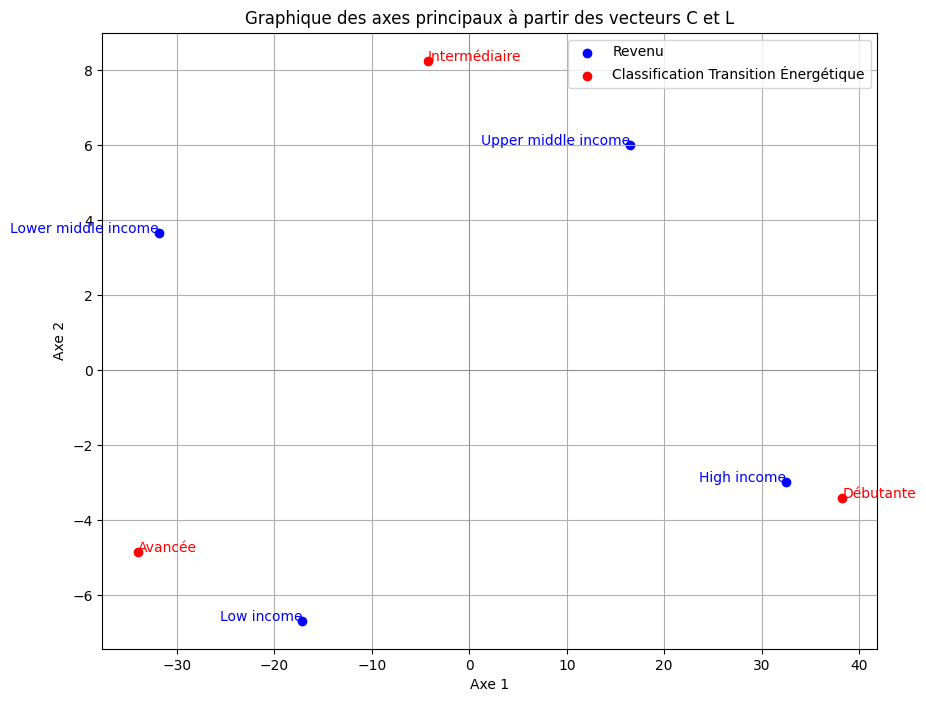

In [5]:
L = svd.fit_transform(residuals) # Coordonnées des lignes (types de revenu)
C = svd.components_.T * svd.singular_values_ # Coordonnées des colonnes (classification transition énergétique) 

# Noms des modalités pour chaque catégorie
revenu_labels = list(contingency_table.index)
transition_labels = list(contingency_table.columns) 

# Tracé du graphique 
plt.figure(figsize=(10, 8)) 

# Affichage des points pour les types de revenu (L) 
plt.scatter(L[:, 0], L[:, 1], color='blue', label='Revenu') 
for i, label in enumerate(revenu_labels): 
    plt.annotate(label, (L[i, 0], L[i, 1]), color='blue', ha='right') 

    # Affichage des points pour les classifications de transition énergétique (C) 
plt.scatter(C[:, 0], C[:, 1], color='red', label='Classification Transition Énergétique')
for i, label in enumerate(transition_labels): 
    plt.annotate(label, (C[i, 0], C[i, 1]), color='red', ha='left') 

# Ajustements du graphique 
plt.title("Graphique des axes principaux à partir des vecteurs C et L")
plt.xlabel("Axe 1") 
plt.ylabel("Axe 2")
plt.axhline(0, color='gray', lw=0.5) 
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Interprétation :

Les produits scalaires entre les coordonnées des modalités révèlent les associations fortes, faibles ou neutres entre les différents niveaux de revenu et les classifications de transition énergétique.

        + Association Positive (Produit Scalaire Positif) : 
    "High Income" & "Débutante" : Une association positive indique qu'il existe une tendance pour certains pays à haut revenu à être dans une phase débutante de la transition énergétique, malgré leurs ressources.

    "Upper Middle Income" & "Intermédiaire" : Ces pays montrent une transition énergétique en cours.

    "Lower Middle Income" & "Avancée" et "Lower Middle Income" & "Intermédiare" :  Ces pays montrent une transition énergétique soit en cours soit avancée.

    "Low Income" & "Avancée" : Les pays à faible revenu sont plus avancés dans la transition énergétique en général.

        + Association Négative (Produit Scalaire Négatif) :
     "Low Income" & "Intermédiare" : Une association négative suggère que les pays à faible revenu sont moins représentés dans la catégorie de transition énergétique intermédiaire.

    "Lower Middle Income" & "Débutante" : Indique que les pays à revenu intermédiaire inférieur sont moins susceptibles d'être en phase débutante de la transition énergétique.
    
    "High Income" & "Avancée" et "High Income" & "Intermédiare" :Les pays à haut revenu montrent une petite susceptibilité d'être classifiés en tant qu' avancés ou intermédiaires dans la transition énergétique.

        + Association Neutre (Produit Scalaire Nul) :
    "Low Income" & "Débutante" : on retrouve une relation neutre entre les pays à revenu faible et une phase débutante de la transition énergitique malgré le manque de ressources.
    
    "Upper Middle Income" et "Débutante" : on observe une relation neutre entre ces pays et une phase débutante de la transition énergitique .

## Axes Factoriels, Profils Lignes/Colonnes et Qualité de Représentation (Cos2)

On re visualise le tableau de contingence

In [6]:
display(contingency_table)

Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


In [7]:
# On crée une instance de la classe CA (Analyse des Correspondances)
afc = CA(
    row_labels=contingency_table.index.values,  
    col_labels=contingency_table.columns.values, 
    stats=True  
)

# Ajuster le modèle AFC en utilisant les valeurs du DataFrame
afc.fit(contingency_table.values)

CA(col_labels=array(['Avancée', 'Débutante', 'Intermédiaire'], dtype=object),
   row_labels=array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object))

### Aides à l'interprétation
#### Choix des axes factorielles

In [8]:
# Accéder aux valeurs propres (Eigenvalues) du modèle d'Analyse des Correspondances (AFC)
print(afc.eig_)

[[4.82072081e-01 3.52295735e-02]
 [9.31897427e+01 6.81025727e+00]
 [9.31897427e+01 1.00000000e+02]]


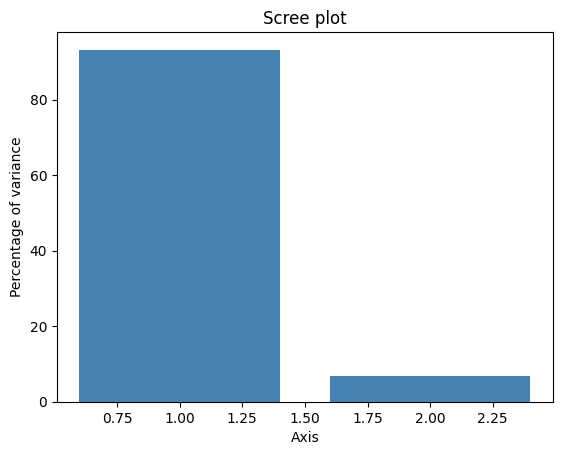

In [9]:
# Visualiser les valeurs propres sous forme de pourcentage de variance expliquée par chaque dimension
afc.plot_eigenvalues(type="percentage")

#### Interptétation
Le premier axe (Axis 1) explique environ 90% de la variance totale des données. Cela signifie que ce premier axe capture une grande partie des relations importantes entre les pays et leur classification de transition énergétique.

Le deuxième axe (Axis 2) explique environ 8% de la variance. Il ajoute des informations supplémentaires mais de manière moins significative que le premier axe.

Ensemble, les deux premières dimensions expliquent environ 98% de la variance totale, ce qui signifie que presque toutes les relations importantes et les variations dans les données sont capturées par ces deux axes.

#### Analyse des qualités de représentation (cos2)

##### 1. Analyse suivant le profil ligne (Revenu)

Premier axe factoriel


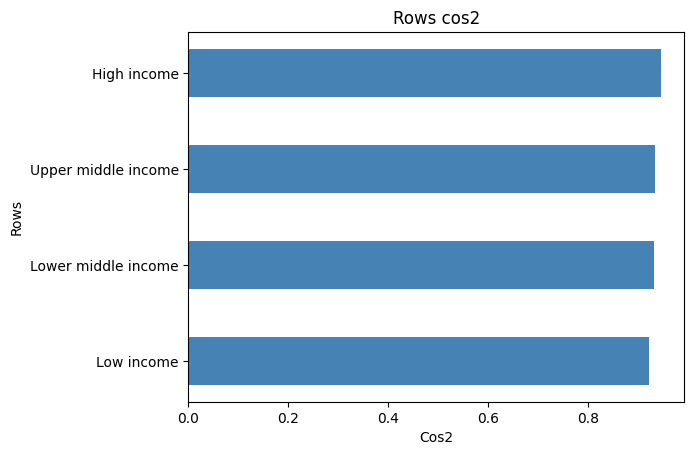

In [10]:
# Afficher la qualité de représentation des lignes (Revenu) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_row_cos2(num_axis=1)

##### Interprétation :
Les valeurs élevées de Cos2 pour toutes les catégories de revenu montrent que le premier axe factoriel capture efficacement les principales relations et variations dans les données de transition énergétique. Cela signifie que les caractéristiques liées à la transition énergétique des pays, qu'ils soient à revenu élevé, intermédiaire supérieur, intermédiaire inférieur ou faible, sont bien expliquées par le premier axe. En d'autres termes, il existe une forte association entre les catégories de revenus des pays et leurs profils de transition énergétique.

Second axe factoriel


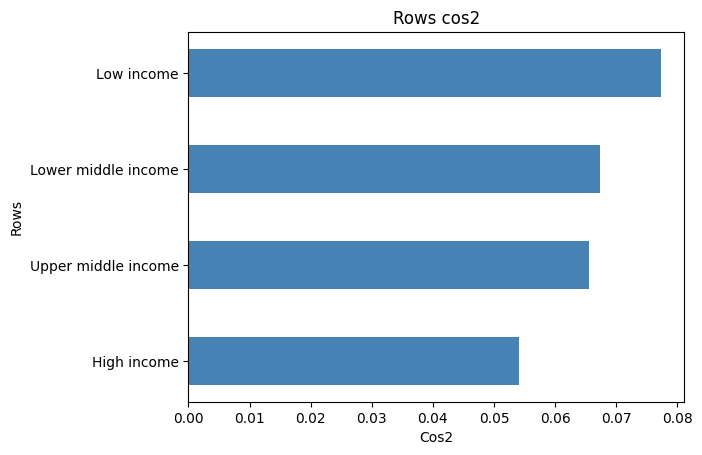

In [11]:
# Afficher la qualité de représentation des lignes (Revenu) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_row_cos2(num_axis=2)

#### Interptétation
    Les valeurs de Cos2 pour le second axe sont très faibles (0.075, 0.067, 0.065 et 0.055), donc les caractéristiques liées aux revenus sont mal expliquées mais elles apportent des nuances supplémentaires et complètent l'analyse du premier axe. Parmi ces faibles valeurs, les pays à revenu faible sont les mieux représentés, tandis que les pays à revenu élevé sont les moins bien représentés par le second axe.

##### 2. Analyse suivant le profil colonne (Classification Transition Énergétique)

Premier axe factoriel


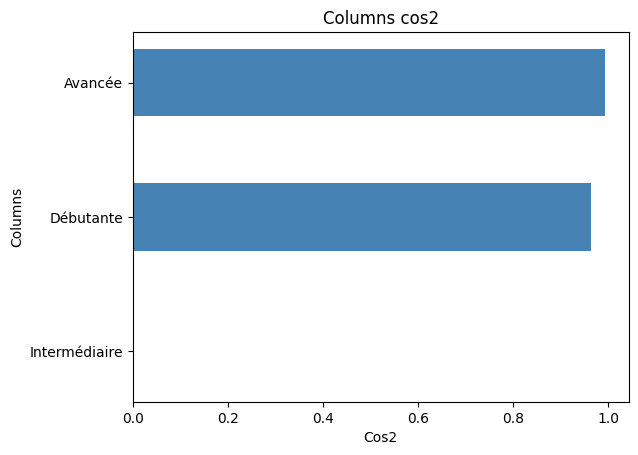

In [13]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_col_cos2(num_axis=1)

#### Interptétation
    + Avancée :
Cos2 proche de 1 : Cette valeur indique une qualité de représentation quasi parfaite par le premier axe. Cela signifie que cette classification est très bien expliquée par ce premier axe.
    
    Interprétation : Les pays ayant des politiques énergétiques avancées sont fortement associés aux caractéristiques principales capturées par le premier axe, ce qui suggère qu'ils suivent des tendances similaires en termes de transition énergétique.

    + Débutante :
Cos2 proche de 1 : Cette valeur montre également une qualité de représentation très élevée par le premier axe.

    Interprétation : Les pays avec des politiques énergétiques débutantes montrent des caractéristiques similaires bien capturées par le premier axe, indiquant que ce premier axe représente efficacement leurs profils de transition énergétique.

    + Intermédiaire :
Cos2 proche de 0, non visible : Cela signifie que cette classification de transition énergétique est mal représentée par le premier axe.
    
    Interprétation : Les pays ayant des politiques énergétiques intermédiaires ne suivent pas les mêmes tendances principales capturées par le premier axe. Leurs variations ne sont pas bien expliquées par cette dimension, suggérant que d'autres axes sont nécessaires pour mieux comprendre leurs profils de transition énergétique.

Second axe factoriel


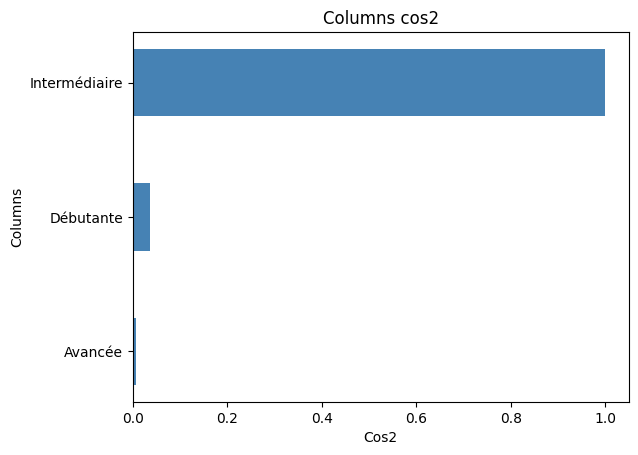

In [14]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_col_cos2(num_axis=2)

#### Interprétation
    + Intermédiaire :
    Cos2 de 0,98 : Cette valeur est très élevée contrairement à celle du premier axe, ce qui signifie que cette classification de transition énergétique est extrêmement bien représentée par le second axe.
     Cette valeur indique que des aspects importants de leur transition énergétique ne sont pas totalement expliqués par le premier axe et nécessitent le second axe pour être pleinement compris.

    + Débutante :
    Cos2 de 0,05 : Bien que cette valeur soit la deuxième plus élevée parmi les classifications de transition énergétique, elle est très faible et donc est faiblement représentées par le second axe.
    
    + Avancée :
    Cos2 de 0,01 : Cette valeur est la plus faible parmi toutes les classifications de transition énergétique, pratiquement égale à 0.
     Les pays ayant des politiques énergétiques avancées ne présentent pas des variations significatives capturées par le second axe, ce qui suggère que les principaux facteurs de leur transition énergétique sont déjà bien expliqués par le premier axe.

#### Analyse des contributions

##### Profils lignes (Revenu) 

Premier axe


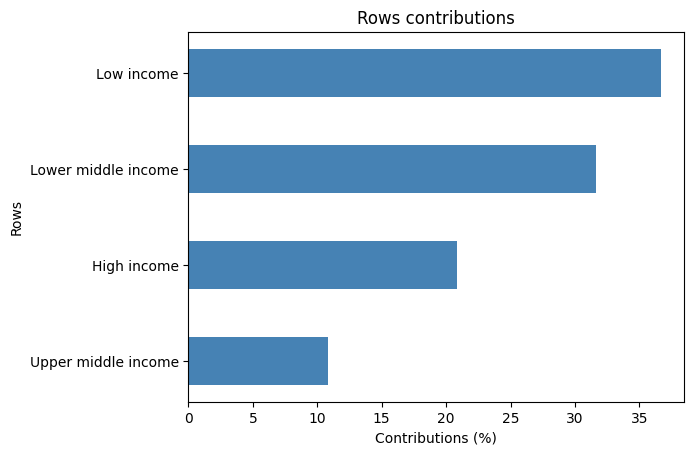

In [15]:
# Afficher la contribution des profils lignes au premier axe factoriel
print("Premier axe")  
afc.plot_row_contrib(num_axis=1)  

#### Interprétation
    Revenu Faible (Low income) : Contribution d'environ 37%. Cela signifie qu'il a été déterminant pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution d'environ 33%. Cela signifie qu'il a également joué un rôle important dans la construction de cet axe.

    Revenu Élevé (High income) : Contribution d'environ 22%. Cela signifie qu'il a eu une influence modérée sur cet axe.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution d'environ 11%. Cela signifie qu'il a joué un rôle mineur dans la construction de cet axe factoriel.

Second axe


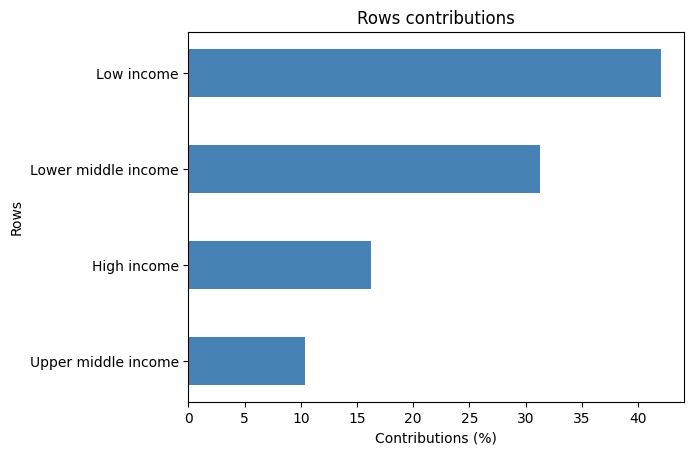

In [16]:
# Afficher la contribution des profils lignes au deuxième axe factoriel
print("Second axe")  
afc.plot_row_contrib(num_axis=2)  

#### Interprétation : 
    Revenu Faible (Low income) : Contribution la plus élevée : 42% . Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution significative (33%) mais inférieure à celle des revenus faibles. Elle a aussi joué un rôle important pour caractériser cet axe.

    Revenu Élevé (High income) : Contribution significativement plus faible que les revenus intermédiaires inférieurs (17 %) et donc a joué un rôle moins important.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution la plus faible (11 %). Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

Profils colonnes (Classification Transition Énergétique) 

Premier axe


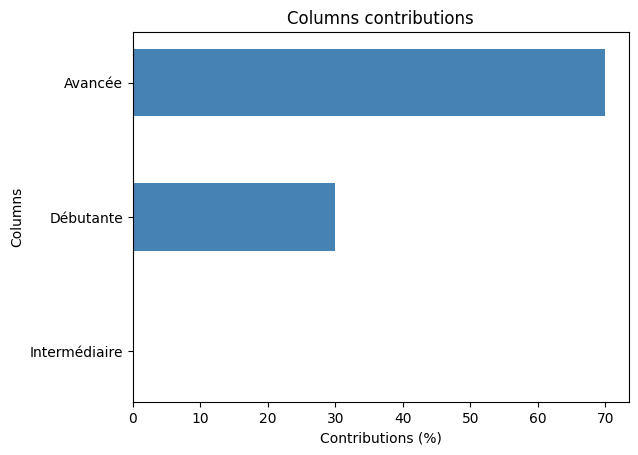

In [17]:
# Afficher la contribution des profils colonnes au premier axe factoriel
print("Premier axe")  
afc.plot_col_contrib(num_axis=1)   

#### Interprétation
    Avancée : Contribution la plus élevée (70 %). Cela signifie que cette classification a été déterminante pour caractériser cet axe.

    Débutante : Contribution significative (environ 32%), mais inférieure à celle de la classification avancée. Elle a également joué un rôle important pour caractériser cet axe.

    Intermédiaire : Contribution non visible. Cela signifie que cette classification a joué un rôle mineur ou inexistant dans la construction de cet axe factoriel.

Second axe


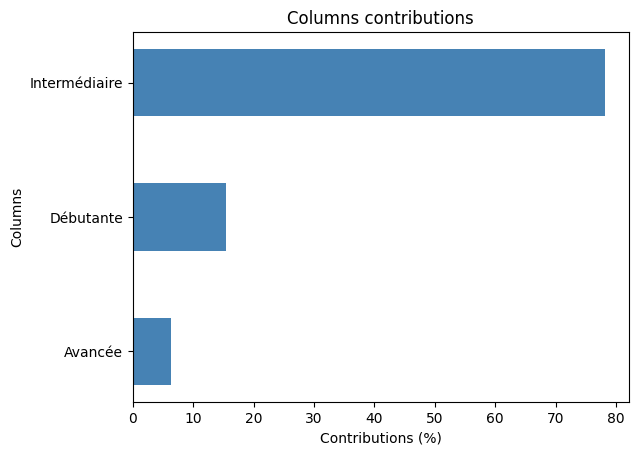

In [18]:
# Afficher la contribution des profils colonnes au deuxième axe factoriel
print("Second axe")  
afc.plot_col_contrib(num_axis=2) 

#### Interprétation

Intermédiaire : Contribution d'environ 78%. Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

Débutante : Contribution significative d'environ 17%, mais inférieure à celle de la classification intermédiaire. Elle a également joué un rôle important pour caractériser cet axe.

Avancée : Contribution plus faible, d'environ 6%. Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

### Analyse Graphique

#### Graphique superposition des profils lignes et colonnes

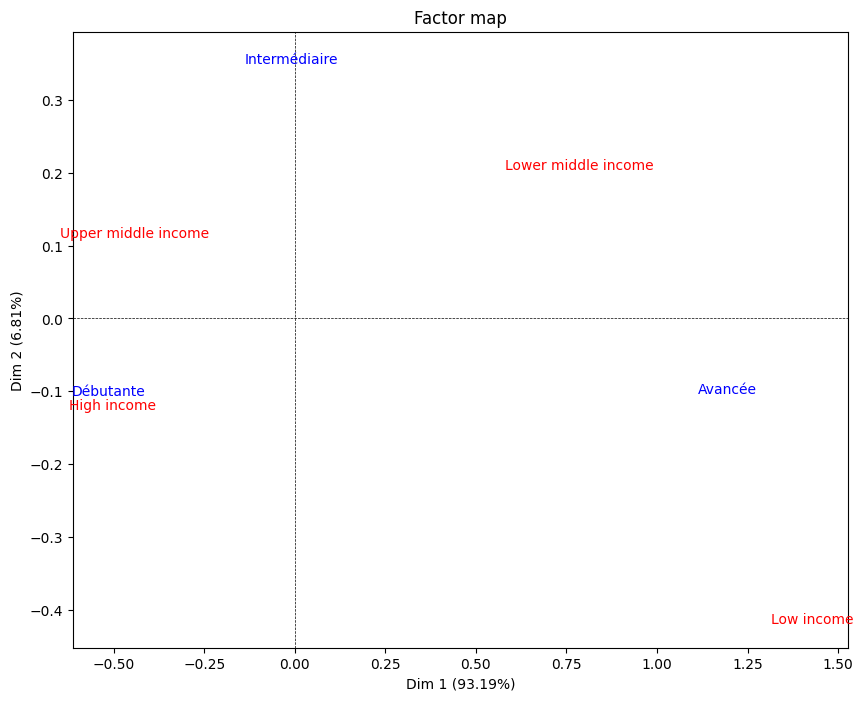

In [19]:
afc.mapping(1, 2, figsize=(10, 8))

**Dimensions et Explication de la Variance :**

   - La première dimension (Dim 1) explique 93.19% de la variance.
   - La deuxième dimension (Dim 2) explique 6.81%.
   - Ensemble, elles expliquent environ 100% de la variance, ce qui indique que ces deux dimensions capturent parfaitement bien la structure des données.
     
**Associations Clés :**

   - **High Income** : ces pays semblent associées à **Débutante** dans la partie inférieur gauche.
   - **Low Income** : Ils sont proches de **Avancée** dans la partie inférieur droite.
   - **Lower Middle Income** et **Upper Middle Income** : Ils sont situés près de **Intermédiaire**.
   - **Lower Middle Income** : ces pays sont également situés près de **Avancée**.

# Réponse à la question 1:  Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

D'après nos interprétations (produits scalaires, Cos² et axes ) :
      Oui, il existe une association significative entre les catégories de revenus et la dépendance aux énergies renouvelables. Les pays à faible revenu tendent paradoxalement à avoir des classifications avancées, tandis que les pays à revenu élevé restent souvent dans des phases débutantes.

# Réponse à la question 2: Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

D'après nos interprétations (Contributions, Cos², analyse par dimensions et analyse graphique) :
Oui, les pays avec des politiques énergétiques avancées proviennent principalement des catégories de revenus faibles ("Low Income") et intermédiaires inférieurs ("Lower Middle Income"). Les pays à faible revenu montrent une forte association positive avec la catégorie "Avancée", tandis que les pays à revenu intermédiaire inférieur présentent également une association positive avec cette catégorie.
En revanche, les pays à revenu élevé ("High Income") et intermédiaire supérieur ("Upper Middle Income") sont faiblement représentés dans cette catégorie.

# B. Analyse en Composante Principale (ACP)

## Objectif 

Identifier les principaux axes expliquant la variance dans l'adoption des énergies renouvelables à partir d'indicateurs économiques et sociaux .

## Questions posées


    1. Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?
	2. Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

## Données nécessaires :

    -Investissements dans les énergies renouvelables (% du PIB) : EG.ELC.RNWX.ZS.
    -PIB par habitant (en USD) : NY.GDP.PCAP.CD.
    -Taux de scolarisation dans le secondaire (% net) : SE.SEC.NENR

### Selection des Données Nécéssaires

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes spécifiques
data_acp = data[[
    "Investissements en énergies renouvelables (% du PIB)",
    "PIB par habitant (USD)",
    "Taux de scolarisation secondaire (%)"
]]

# Affichage des données sélectionnées
print(data_acp.head())

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  
0              415.707417                             47.154018  
1             1659.515290                             69.520690  
2             1568.724310                             69.520690  
3             8575.171134                             86.322940  
4             5364.027950                             69.520690  


# Préparation des données

On met les données sur une échelle comparable pour effectuer une analyse significative.

In [24]:
sc = StandardScaler()
# Centrage et réduction
Z = sc.fit_transform(data_acp)

# Matrice de nuage

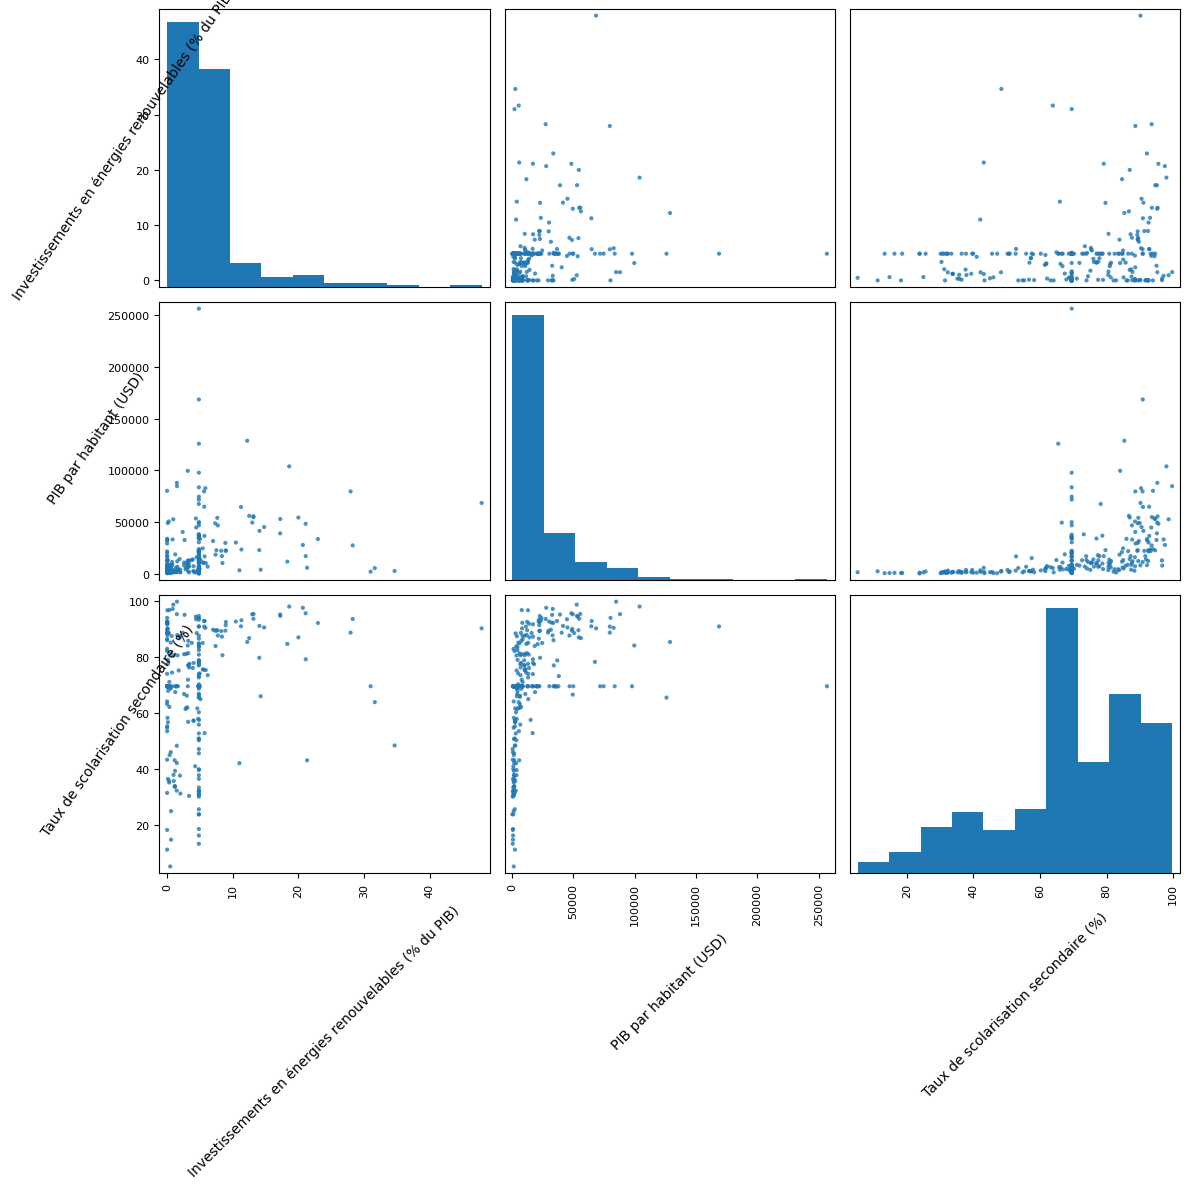

In [25]:
scatter_matrix = pd.plotting.scatter_matrix(
    data_acp,
    alpha=0.8,
    figsize=(12, 12),
    diagonal='hist'
)

# Personnaliser les axes pour rendre les labels plus lisibles
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=55)

plt.tight_layout()  # Pour éviter le chevauchement des éléments
plt.show()

#### Interprétation
### Observations générales :
1. **Distribution des variables (diagonale principale)** :
   - Chaque histogramme sur la diagonale montre la distribution d'une variable.
   - Par exemple :
     - Les **investissements en énergies renouvelables** sont concentrés vers des valeurs faibles (moins de 10 %).
     - Le **PIB par habitant** est fortement asymétrique, avec une majorité des pays ayant un PIB inférieur à 50 000 USD.
     - Le **taux de scolarisation secondaire** est réparti autour de 60 % à 100 %, indiquant une scolarisation élevée dans de nombreux pays.

2. **Relations entre les variables (hors diagonale)** :
   - **Investissements en énergies renouvelables vs. PIB par habitant** :
     - La densité de points est plus élevée pour les pays ayant un faible pourcentage d'investissements et un PIB faible ou modéré.
     - Aucun lien clair n'apparaît ici (pas de tendance linéaire visible).
   - **PIB par habitant vs. Taux de scolarisation secondaire** :
     - Une tendance semble indiquer qu'un PIB élevé est souvent associé à un taux de scolarisation secondaire élevé.
     - Cela reflète une possible corrélation positive entre développement économique et éducation.
   - **Investissements en énergies renouvelables vs. Taux de scolarisation secondaire** :
     - Il n'y a pas de tendance claire ; les points sont dispersés.

### Conclusions :
- Le PIB par habitant semble être positivement lié au taux de scolarisation secondaire.
- Les investissements en énergies renouvelables ne montrent pas de relation évidente avec les autres variables.
- Les distributions des données suggèrent une forte concentration autour de certaines valeurs (ex. PIB faible ou scolarisation élevée).

# ACP

In [26]:
#instanciation
acp = PCA()

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

3


# Variances

In [27]:
#variance expliquée
print(acp.explained_variance_)

[1.59085907 0.83600704 0.58445464]


#### Interprétation
- La première valeur propre (**1.59**) est nettement dominante, représentant environ **53%** (1.59/3) de la variance totale.
- La deuxième valeur propre (**0.83**) représente environ **28%** de la variance.
- La dernière valeur propre est de (**0.58**),la plus faible parmi les valeurs présentes (**19%**) .

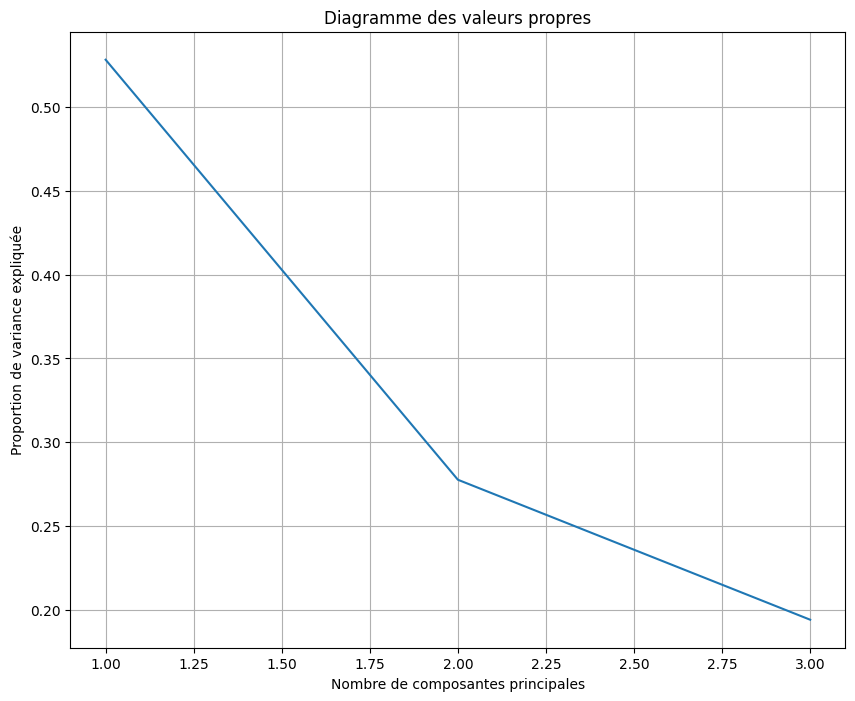

In [28]:
pca = PCA(n_components=len(data_acp.columns))
pca.fit(coord)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

#### Interprétation

#### Première composante (CP1) :

- Elle explique environ **53%** de la variance totale (proportion ≈ 0.53).
- C'est la composante la plus importante, ce qui indique qu'elle capture une grande partie des variations présentes dans les données

#### Deuxième composante (CP2) :

- Elle explique environ **28%** de la variance (proportion ≈ 0.28).
- La nette "rupture" visible après cette composante (effet du coude dans le graphique) montre qu'à partir de cette composante, l'information ajoutée est beaucoup moins significative.

#### Troisième composantes (CP3)  :

- Elles expliquent chacune moins de **19%** de la variance (proportion ≈ 0.19).
- Cette composante contribue relativement peu à la description des données et semble moins pertinente que les deux composantes précédentes pour une analyse principale.

---

#### Conclusions :

- Le "coude" très marqué après la deuxième composante montre clairement qu'il serait judicieux de conserver que **2 composantes principales**.
- Avec ces 2 composantes, on atteint une couverture de **81%** de la variance totale, ce qui est excellent pour une réduction dimensionnelle efficace.
- La réduction de dimension de **3 à 2 variables** permet de simplifier l'analyse tout en préservant l'essentiel des informations contenues dans les données.

# Individus

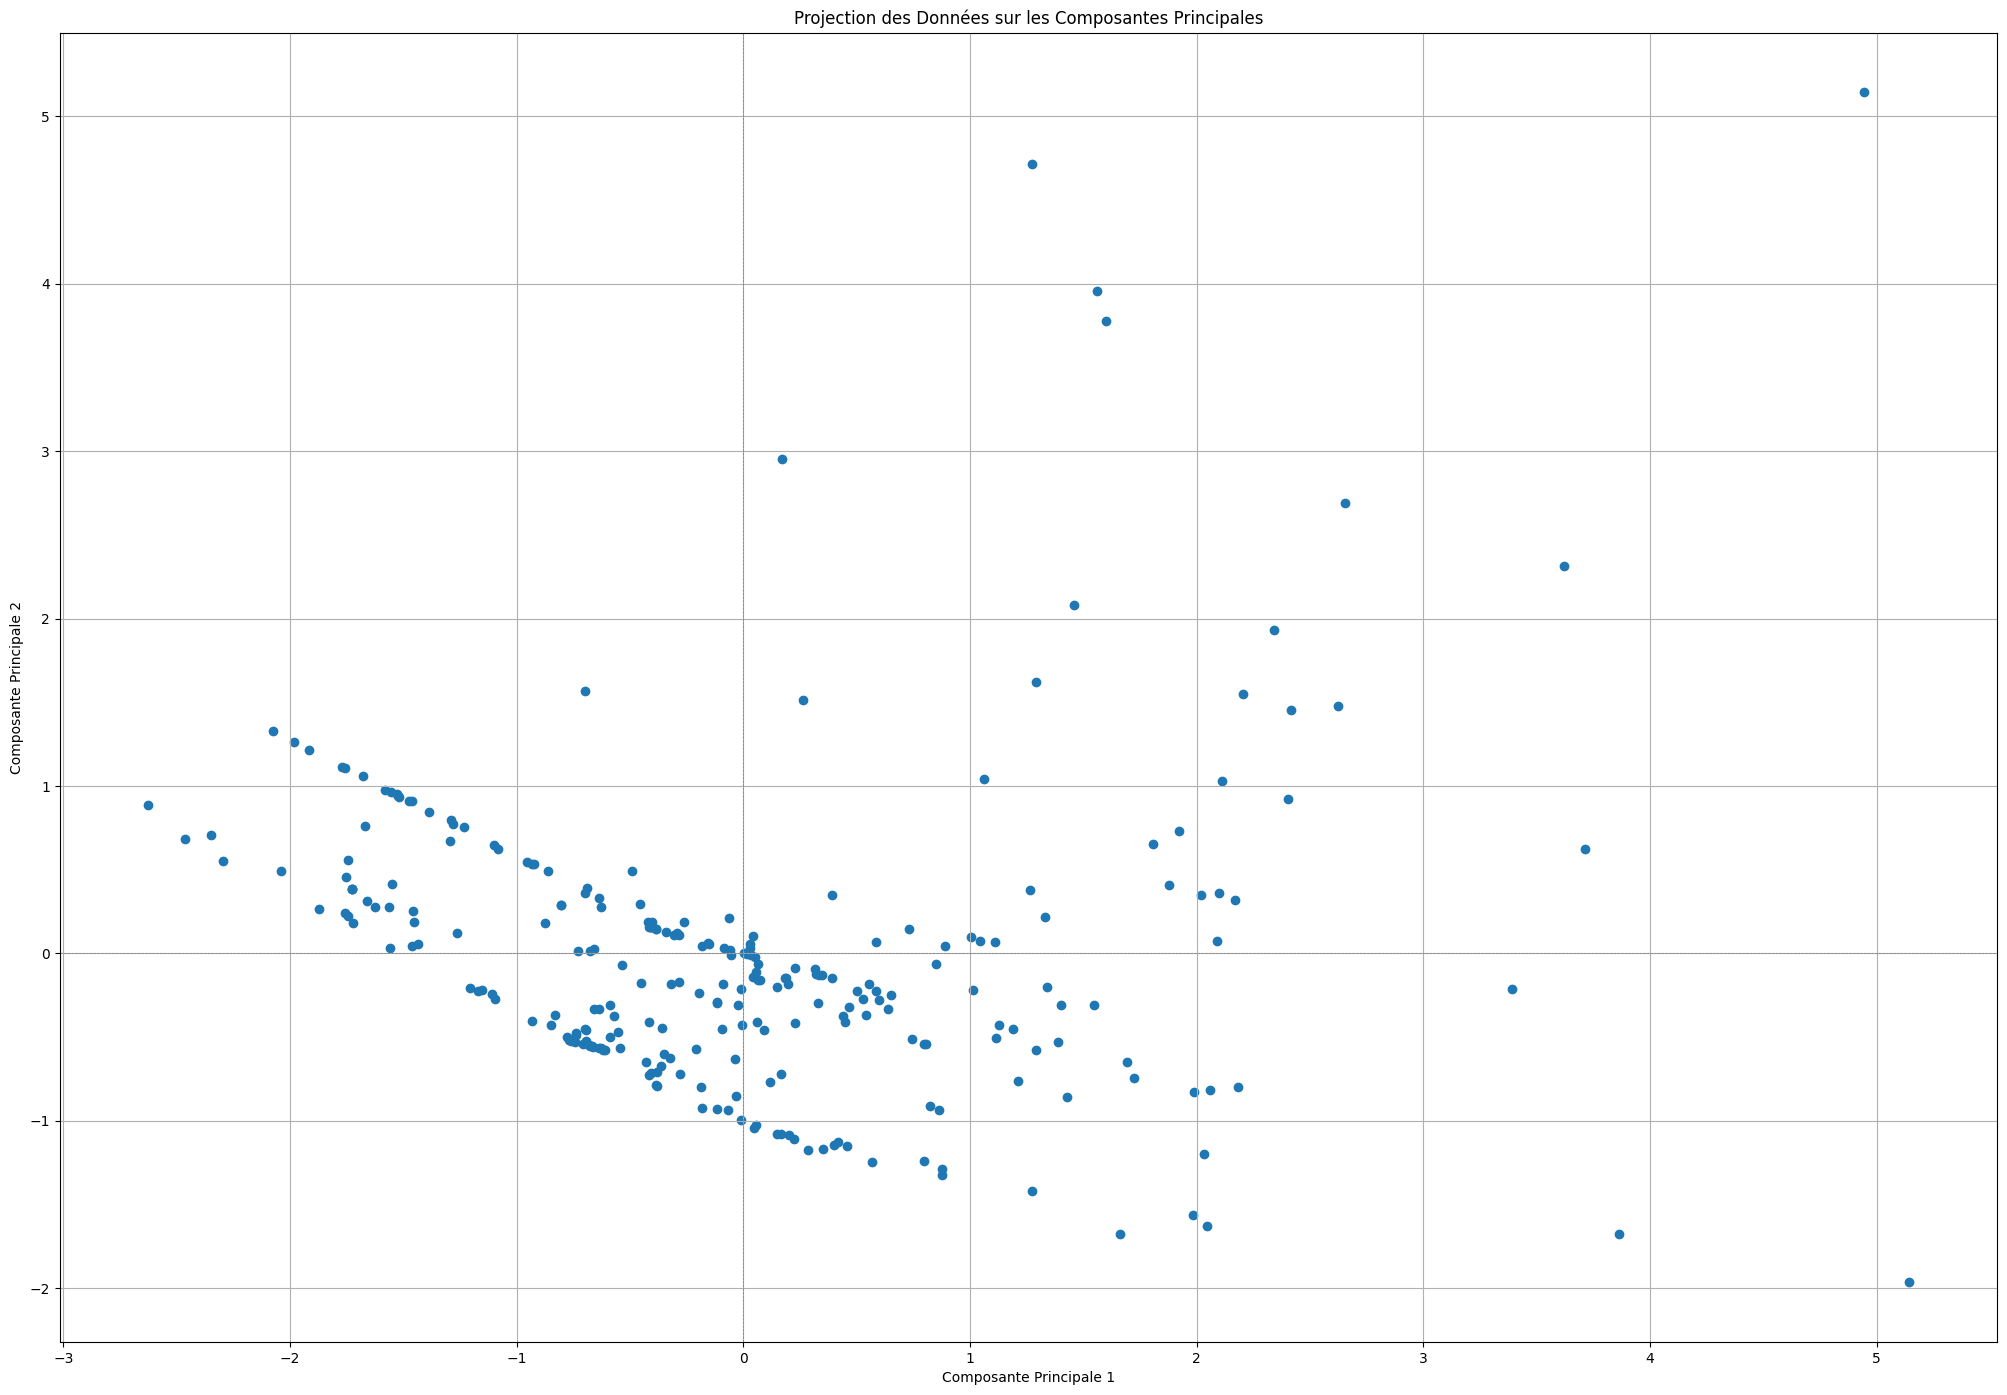

In [29]:
plt.figure(figsize=(25, 17))
plt.scatter(coord[:, 0], coord[:, 1])

# Boucle pour annoter les points avec les noms des pays
#for i in range(len(coord)):
 #   plt.annotate(data['Pays'].iloc[i], (coord[i, 0], coord[i, 1] + 0.1))

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


#### Interprétation :
L'axe horizontal (Composante Principale 1) et l'axe vertical (Composante Principale 2) représentent les deux principales dimensions qui expliquent la plus grande part de variance dans les données. Ensemble, elles capturent environ 81% de la variance totale.

Distribution des Points :

Chaque point représente un pays. La position du point dans cet espace bidimensionnel montre comment le pays se situe par rapport aux deux composantes principales.

Les points qui sont proches les uns des autres dans ce graphique sont des pays qui présentent des similarités en termes des variables étudiées (Investissements en énergies renouvelables, PIB par habitant, et taux de scolarisation secondaire).

Sur CP1, la plupart des points s'étalent de -3 à 3, ce qui est une grande dispersion.
Pour CP2, la plupart des points s'étalent de -2 à 2, ce qui est également une grande dispersion


# Variables

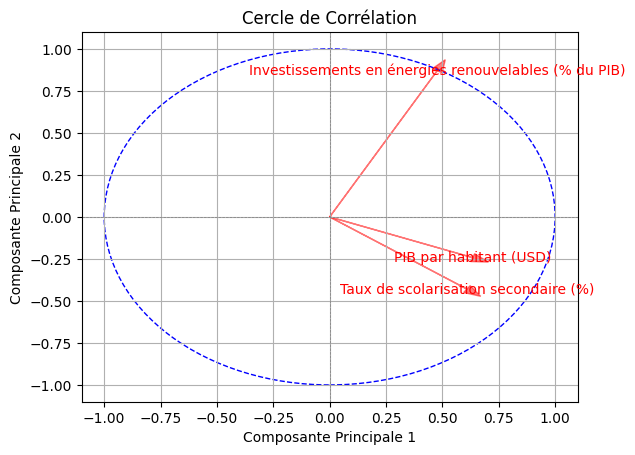

In [30]:
acp = PCA(n_components=2)
coord = acp.fit_transform(Z)
components = acp.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, data_acp.columns[i], color='r', ha='center', va='center')

# Tracer un cercle, alpha=0.5
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

#### Interprétation :
    -Investissements en énergies renouvelables et CP2: Il existe une corrélation forte et spécifique entre les investissements en énergies renouvelables et la deuxième composante principale. 
    
    -PIB par habitant et CP1: Le PIB par habitant est fortement corrélé à la première composante principale
    
    -Taux de scolarisation et CP1: Le taux de scolarisation est également corrélé à la première composante principale, mais moins fortement que le PIB.
    
    -Angle entre les vecteurs: L'angle quasi droit entre les vecteurs représentant les investissements en énergies renouvelables et les autres variables suggère que ces investissements sont relativement indépendants des autres facteurs considérés. Contrairement au PIB et le taux de scolarisatation secondaire qui indiquent une certaine corrélation vu le petit angle entre ces deux variables.
    
    -Les investissements sont le mieux  représentée dans ce plan (flèche plus longue).

    -La Composante Principale 1 (axe horizontal) est liée au PIB et le taux de scolarisation, bien que moins à cette dernière.
    -La Composante Principale 2 (axe vertical) est fortement influencée les investissements

# Réponse à la question 1: Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?

Les principaux facteurs identifiés sont :

    Investissements en énergies renouvelables (% du PIB) : Ils sont représentés par la Composante Principale 2 (CP2) et sont relativement indépendants des autres variables économiques et sociales.
    PIB par habitant : Fortement lié à la Composante Principale 1 (CP1). Un PIB plus élevé favorise des investissements en énergies renouvelables indirectement via des impacts sur les structures économiques.
    Taux de scolarisation dans le secondaire (%) : Corrélé au PIB (corrélation plus faible avec CP1).On pourrait déduire que ce facteur influence indirectement les investissements en énergies renouvelables via une meilleure éducation et sensibilisation

# Réponse à la question 2: Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

    Composante Principale 1 (CP1) : Liée principalement au PIB par habitant et au taux de scolarisation. Elle reflète un axe socio-économique général qui englobe les conditions favorables à l'adoption des énergies renouvelables (richesse et éducation).

    Composante Principale 2 (CP2) : Liée spécifiquement aux investissements en énergies renouvelables. Cette composante mesure directement l’engagement financier des pays dans la transition énergétique, indépendamment du PIB et de l'éducation.

En bref, CP1 reflète les conditions socio-économiques globales, tandis que CP2 reflète l'effort financier spécifique des pays pour la transition énergétique.